In [2]:
import numpy as np
from scipy.optimize import minimize
from groo.groo import get_root
import matplotlib.pyplot as plt
import pandas as pd
import sys, os

from groo.groo import get_root
rf = get_root(".hidden_root_mc")
sys.path.append(os.path.join(rf))

from models_and_funcs import *

In [3]:
data = pd.read_csv(os.path.join(rf, "data", "model_comparison.csv"))

### Correctly identified model


correct_AIC     0.402778
correct_AICc    0.416667
correct_BIC     0.402778
dtype: float64


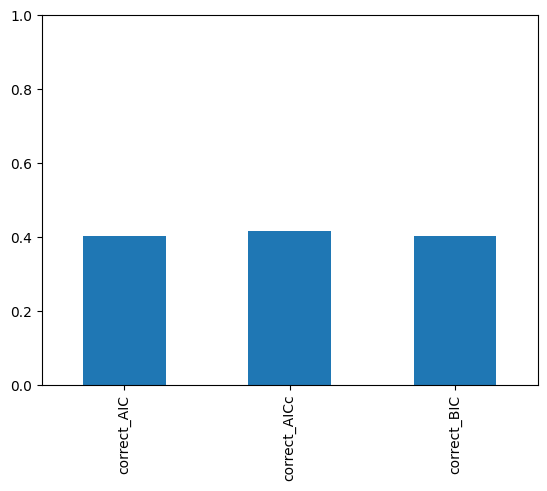

In [10]:
for ic in ["AIC", "AICc", "BIC"]: 
    data["correct_"+ic] = data["true_model"] == data["best_model_"+ic]

data.filter(regex='^correct_').mean().plot.bar(ylim=[0,1])
print(data.filter(regex='^correct_').mean())

<AxesSubplot: xlabel='true_model'>

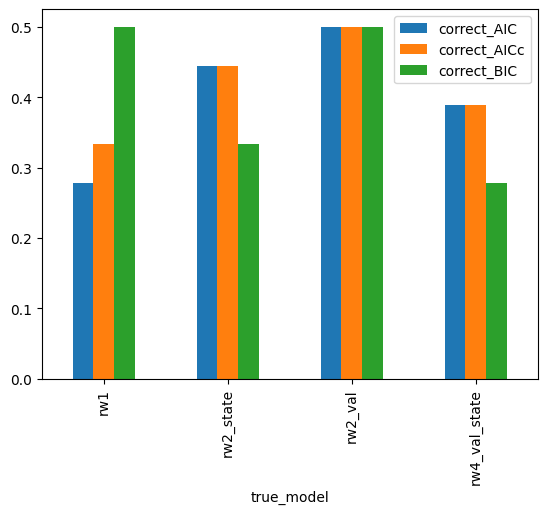

In [17]:
tdf = data.loc[:, ["true_model"]+["correct_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="true_model").mean().plot.bar()


<AxesSubplot: xlabel='noise'>

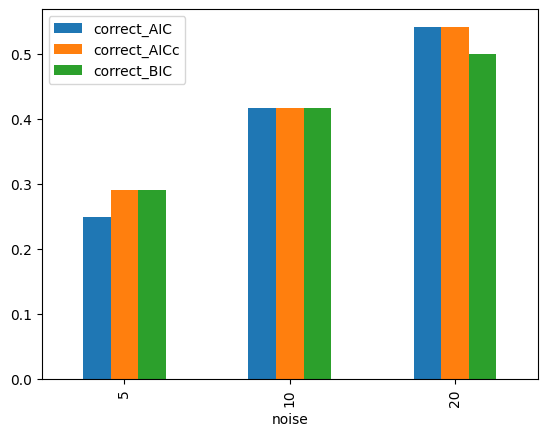

In [19]:
tdf = data.loc[:, ["noise"]+["correct_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="noise").mean().plot.bar()

<AxesSubplot: xlabel='cutoff'>

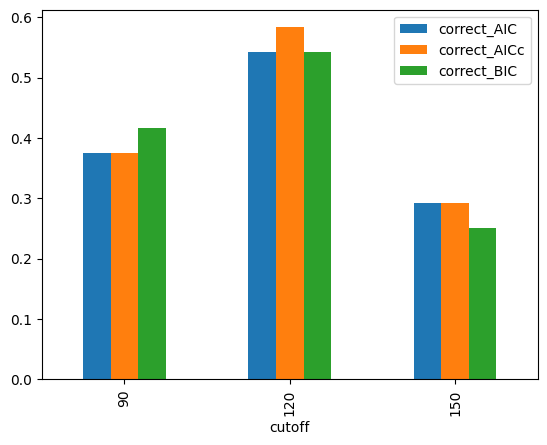

In [20]:
tdf = data.loc[:, ["cutoff"]+["correct_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="cutoff").mean().plot.bar()

### Mean error

mean_err_AIC     1.849104
mean_err_AICc    1.849104
mean_err_BIC     2.042743
dtype: float64


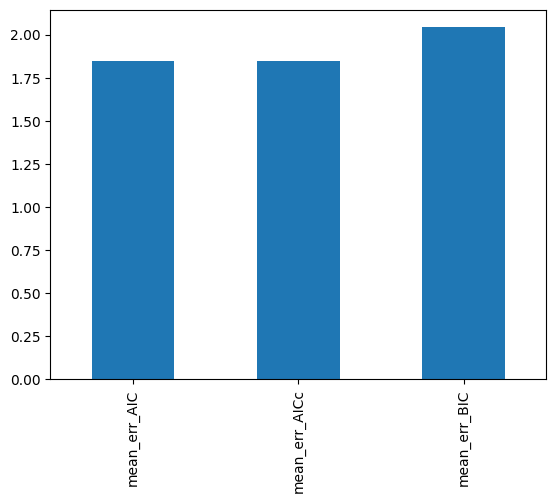

In [24]:

data.filter(regex='^mean_err_').median().plot.bar()
print(data.filter(regex='^mean_err_').median())

<AxesSubplot: xlabel='true_model'>

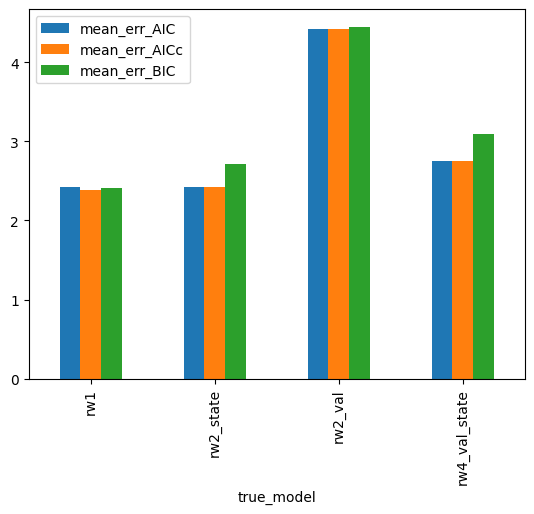

In [25]:
tdf = data.loc[:, ["true_model"]+["mean_err_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="true_model").mean().plot.bar()

<AxesSubplot: xlabel='noise'>

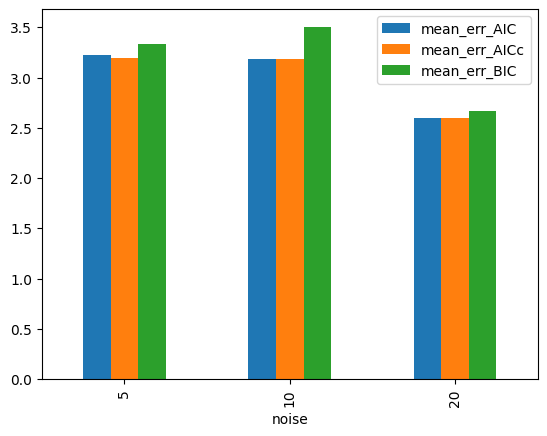

In [26]:
tdf = data.loc[:, ["noise"]+["mean_err_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="noise").mean().plot.bar()

In [ ]:
tdf = data.loc[:, ["noise"]+["mean_err_"+ic for  ic in ["AIC", "AICc", "BIC"]]]
tdf.groupby(by="cutoff").mean().plot.bar()